In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

auto valores reales: c1e^lamv1+c2e^lambv2
auto valores imaginarios: (R I)e^lamb(rcos(tita -bt) rsen(tita-bt))
*   reales =0 circulo sino espirales

x=x*x~(T/t*) con T~=T/t* y=y*y~(T/t*) lo derivas t despues lo igualas a lo que tenias antes teniendo dx~/dt~ y ahi haces lo de siempre
x´= x*x~/T*(T/T*)
y´= y*y~/T*(T/T*)


y´+P(x)y=Q(x)
factor integrante = eîntgralp(x)dx
despues d/dx(y*eîntgralp(x)dx)
tomo la ec dif y multiplico por el factor integrante
como me queda esto d/dx(y*eîntgralp(x)) lo integro  y despues despejo y






In [ ]:
def euler(dx_dt, t0, x0, h, tf, lam):
    pasos = int((tf - t0) / h)
    t = np.linspace(t0, tf, pasos+1)
    x = np.zeros(pasos+1)

    x[0] = x0

    for i in range(1, pasos+1):
        x[i] = x[i-1] + h * dx_dt(t[i-1], x[i-1], lam)

    return t, x


function de Liapunov V(x) para saber si es fuerte o debil la derivada de V(X)= dv/x1 x1punto si eso es<=0 es debil si es <0 es fuerte. y para saber que es function de liapunox tiene que cumplir que V(x)>V(pto de equilibrio)
ej: V(x)= x_2^2/2 +kx_1^2/2 pto (0,0)
retorte x¨=-kx
x_1pto=x_2
x_2pto=-kx_1
dv/x1 x_1pto +dv/x2 x_2pto=kx_1+x_2+x_2(-kx_1) ==0 entonces debil

In [ ]:
def euler_modificado(dx_dt, t0, x0, h, tf, lam): #rush cuta donde estoy a donde quiero ir
    pasos = int((tf - t0) / h)
    t = np.linspace(t0, tf, pasos+1)
    x = np.zeros(pasos+1)

    x[0] = x0

    for i in range(1, pasos+1):
        slope_k = (dx_dt(t[i-1], x[i-1], lam) + dx_dt(t[i], x[i-1] + h * dx_dt(t[i-1], x[i-1], lam), lam)) / 2
        x[i] = x[i-1] + h * slope_k

    return t, x

x´´+mux´+25=0
x_0=x, x_1=x´, x_1´= x¨
x_0´=x_1
x_1´= -mux_1-25x_0

In [ ]:
def heun(dx_dt, t0, x0, h, tf, lam): #rush cuta pto medio
    pasos = int((tf - t0) / h)
    t = np.linspace(t0, tf, pasos+1)
    x = np.zeros(pasos+1)

    x[0] = x0

    for i in range(1, pasos+1):
        slope_i = dx_dt(t[i-1], x[i-1], lam)
        slope_mid = dx_dt(t[i-1] + 0.5*h, x[i-1] + 0.5*h*slope_i, lam)
        x[i] = x[i-1] + h * slope_mid

    return t, x

In [ ]:
def dx_dt(x , y, lam):
  return lam * y

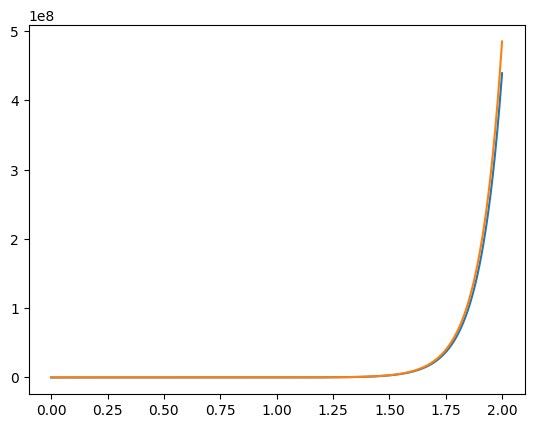

In [ ]:
x1, y1 = euler(dx_dt, 0, 1, 0.001, 2, 10)
plt.plot(x1, y1)
plt.plot(x1, [math.exp(10*x)for x in x1])

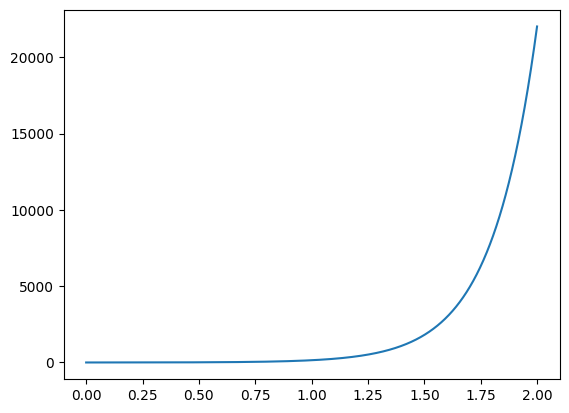

In [ ]:
plt.plot(x1, [math.exp(5*x)for x in x1])

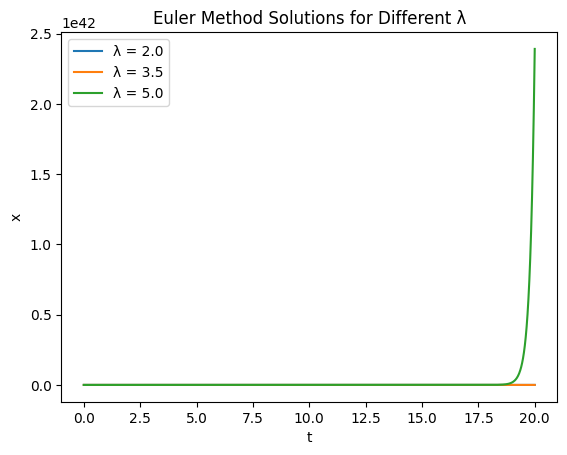

In [ ]:
lams = np.linspace(2,5,3)
for lam in lams:
    x, y = euler(dx_dt, 0, 1, 0.01, 20, lam)
    plt.plot(x, y, label=f'λ = {lam}')

plt.plot(0, np.exp(3 * np.array(sol_h001[0])), c='k', linestyle='--', label='Exact Solution')

plt.xlabel('t')
plt.ylabel('x')
plt.title('Euler Method Solutions for Different λ')
plt.legend()
plt.show()

In [ ]:
def euler(t0,tf,y0,h,f,l):
    t = np.arange(t0,tf+h,h)
    y = [y0]
    for i in range(len(t)-1):
        y.append(y[-1]+h*f(t[i],y[-1],l))
    return t,y

def f_exp(t,y,l):
    return l*y

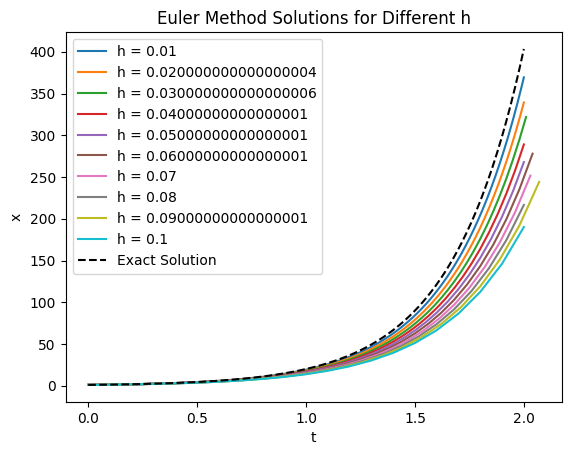

In [ ]:
hs = np.linspace(0.01,0.1,10)
xs = []
i=0
for h in hs:
    x, y = euler(0, 2, 1, h, f_exp, 3)
    plt.plot(x, y, label=f'h = {h}')
    i= i+1

t_exact = np.linspace(0, 2, 100)
plt.plot(t_exact, np.exp(3 * t_exact), c='k', linestyle='--', label='Exact Solution')


plt.xlabel('t')
plt.ylabel('x')
plt.title('Euler Method Solutions for Different h')
plt.legend()
plt.show()

Copio de Osvaldo

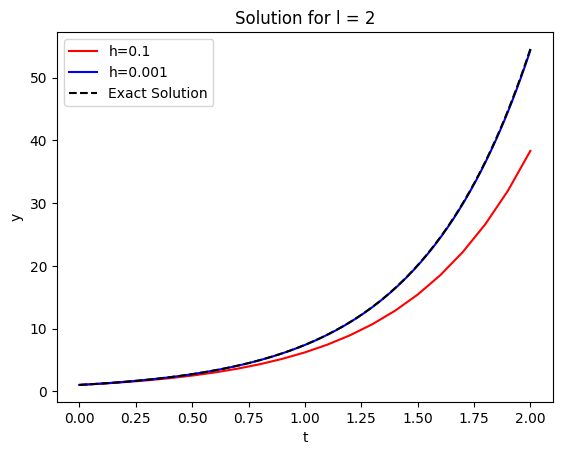

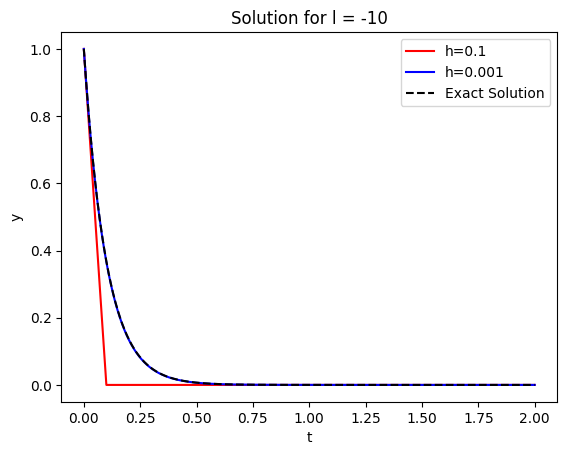

In [ ]:
sol_h1 = euler(0, 2, 1, 0.1, f_exp, 2)
sol_h001 = euler(0, 2, 1, 0.001, f_exp, 2)

plt.plot(sol_h1[0], sol_h1[1], c='r', label='h=0.1')
plt.plot(sol_h001[0], sol_h001[1], c='b', label='h=0.001')
plt.plot(sol_h001[0], np.exp(2 * np.array(sol_h001[0])), c='k', linestyle='--', label='Exact Solution')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution for l = 2')
plt.legend()
plt.show()

# Realiza la simulación y visualización para l = -10
sol_h1 = euler(0, 2, 1, 0.1, f_exp, -10)
sol_h001 = euler(0, 2, 1, 0.001, f_exp, -10)

plt.plot(sol_h1[0], sol_h1[1], c='r', label='h=0.1')
plt.plot(sol_h001[0], sol_h001[1], c='b', label='h=0.001')
plt.plot(sol_h001[0], np.exp(-10 * np.array(sol_h001[0])), c='k', linestyle='--', label='Exact Solution')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution for l = -10')
plt.legend()
plt.show()

In [ ]:
# Euler para el oscilador armonico

"""
La ecuacion diferencial es
y'' = -y
La convertimos en un sistema de ecuaciones de primer orden con el cambio de
variables y' = u, y entonces y'' = u' = -y.
y' = u
u' = -y
Resolvemos con un metodo de Euler para las dos variables a la vez con dos
condiciones iniciales y0, u0.
y es la posicion del oscilador, u es la velocidad
"""

def euler_2(t0,tf,y0, u0,h,f1,f2):
    t = np.arange(t0,tf+h,h)
    y = [y0]
    u = [u0]
    for i in range(len(t)-1):
        y_aux = y[-1]
        y.append(y[-1]+h*f1(t[i],y[-1],u[-1]))
        u.append(u[-1]+h*f2(t[i],y_aux,u[-1]))
    return t,y,u

def f1(t,y,u):
    return u

def f2(t,y,u):
    return -y

def energia(y,u):
    e = []
    for i in range(len(y)):
        e.append((y[i]**2+u[i]**2)/2)
    return e

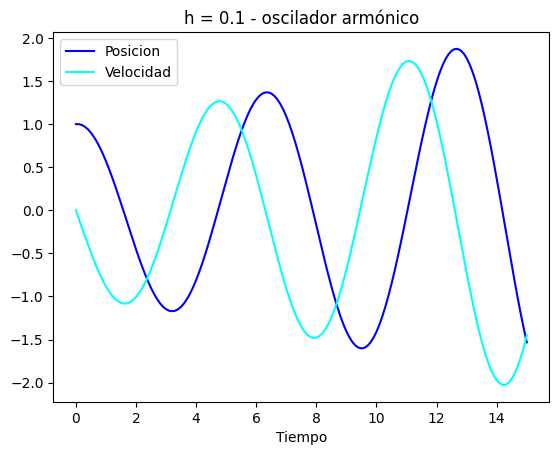

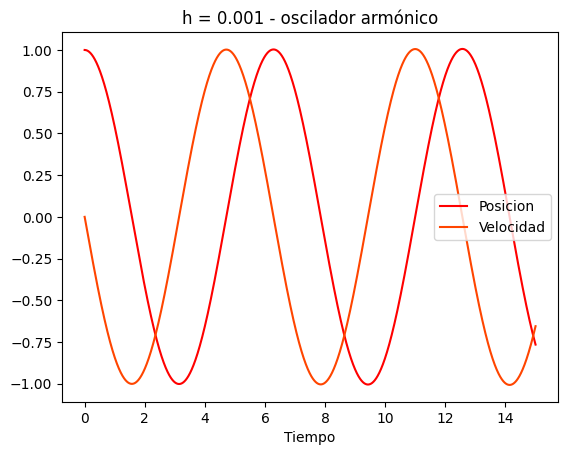

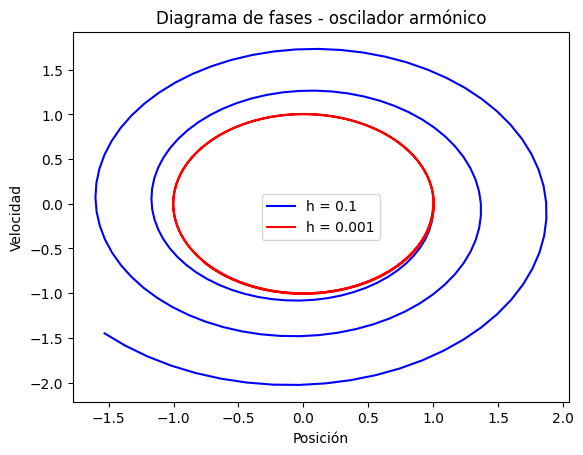

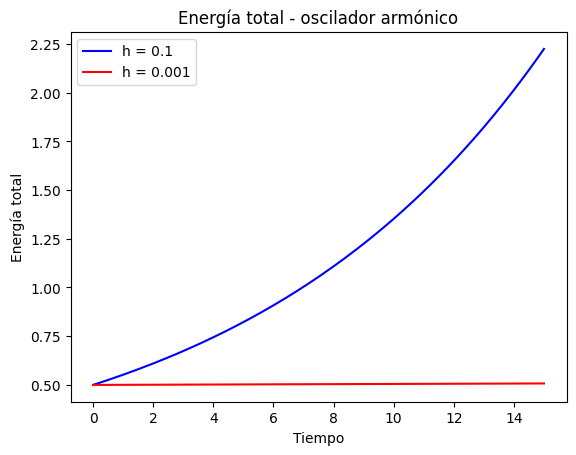

In [ ]:

# sol_osc_h1 = (t,y,u)
sol_osc_h1 = euler_2(0,15,1,0,0.1,f1,f2)
sol_osc_h001 = euler_2(0,15,1,0,0.001,f1,f2)

plt.plot(sol_osc_h1[0], sol_osc_h1[1], c = 'b', label = 'Posicion')
plt.plot(sol_osc_h1[0], sol_osc_h1[2], c = 'cyan', label = 'Velocidad')
plt.xlabel('Tiempo')
plt.title('h = 0.1 - oscilador armónico')
plt.legend()
plt.show()

plt.plot(sol_osc_h001[0], sol_osc_h001[1], c = 'r', label = 'Posicion')
plt.plot(sol_osc_h001[0], sol_osc_h001[2], c = 'orangered', label = 'Velocidad')
plt.xlabel('Tiempo')
plt.title('h = 0.001 - oscilador armónico')
plt.legend()
plt.show()

plt.plot(sol_osc_h1[1], sol_osc_h1[2], c = 'b', label = 'h = 0.1')
plt.plot(sol_osc_h001[1], sol_osc_h001[2], c = 'r', label = 'h = 0.001')
plt.xlabel('Posición')
plt.ylabel('Velocidad')
plt.title('Diagrama de fases - oscilador armónico')
plt.legend()
plt.show()

plt.plot(sol_osc_h1[0], energia(sol_osc_h1[1],sol_osc_h1[2]), c = 'b', label = 'h = 0.1')
plt.plot(sol_osc_h001[0], energia(sol_osc_h001[1],sol_osc_h001[2]), c = 'r', label = 'h = 0.001')
plt.xlabel('Tiempo')
plt.ylabel('Energía total')
plt.title('Energía total - oscilador armónico')
plt.legend()
plt.show()

In [ ]:
 #Oscilador amortiguado

"""
La ecuacion diferencial es
y'' = -y - gama*y'
La convertimos en un sistema de ecuaciones de primer orden con el cambio de
variables y' = u, y entonces y'' = g - gama * u**2
y' = u
u' = -y - gama * u
Resolvemos con un metodo de Euler para las dos variables a la vez con dos
condiciones iniciales y0, u0.
y es la posicion del oscilador, u es la velocidad
"""

def f_amort(t,y,u,gama):
    return -y - gama * u

def euler_amort(t0,tf,y0,u0,h,f1,f2,gama):
    t = np.arange(t0,tf+h,h)
    y = [y0]
    u = [u0]
    for i in range(len(t)-1):
        y_aux = y[-1]
        y.append(y[-1]+h*f1(t[i],y[-1],u[-1]))
        u.append(u[-1]+h*f_amort(t[i],y_aux,u[-1],gama))
    return t,y,u